<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

[1.] Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [407]:
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', encoding = 'utf-8', sep = ';')

[2.] Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

### [Задание 2.1]
#### Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).

In [408]:
data.shape

(44744, 12)

#### Загруженный файл содержит 44744 строк и 12 столбцов

### [Задание 2.2]
#### В каком формате представлен порядок слов в признаке «Пол, возраст»?

In [409]:
display(data.head(2))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано


In [410]:
display(data.tail(2))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


#### Данные в признаке «Пол, возраст» представлены в следующем порядке  **<Пол , возраст , дата рождения>**

[3.] Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

### [Задание 2.3]
#### Какой тип данных имеют все столбцы? Введите его в поле для ответа.

#### Тип данных столбцов - ** object **

[4.] Обратите внимание на информацию о числе непустых значений.

### [Задание 2.4]
#### Выберите все признаки, в которых есть пропуски в данных:

#### Пропуски в данных содержат признаки: **Опыт работы, Последнее/нынешнее место работы, Последняя/нынешняя должность**

[5.] Выведите основную статистическую информацию о столбцах.


In [412]:
display(data.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


### [Задание 2.5]
#### Сколько уникальных значений содержится в столбце «Опыт работы»?

#### **В столбце «Опыт работы» 44413 уникальных значений**

#### Какая из искомых должностей самая распространённая? Введите название.

#### **Самая распространённая должность - Системный администратор**

# Преобразование данных

[1.] Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [413]:
data_sample = data.copy() # создаем копию исходного датасета

In [414]:
def get_education(edu_type):
    '''Получаем из строки категорию образования
    Args:
        str (edu_type): строка признака
    Returns:
        str: категорию образования
    '''
    edu_type_list = edu_type.split()
    edu_level = " ".join(edu_type_list[:2])
    #print(edu_level)
    if 'образование'in edu_level:
        edu_level = "".join(edu_type_list[0])
        
    return edu_level

In [415]:
data_sample['Образование'] = data_sample['Образование и ВУЗ'].apply(get_education)

#### Проверяем полученную категорию 'Образование'

In [416]:
data_sample['Образование'].unique()

array(['Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Среднее'],
      dtype=object)

### [Задание 3.1]
#### Сколько соискателей имеет средний уровень образования (школьное образование)?

In [417]:
data_sample['Образование'].value_counts()['Среднее']

559

#### Удаляем столбец 'Образование и ВУЗ' с помощью функции drop()

In [418]:
data_sample = data_sample.drop(['Образование и ВУЗ'], axis = 1)

In [419]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

[2.] Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


### Преобразуем признак 'Пол, возраст' и создадим признак "Возраст" 

In [420]:
def get_age(str):
    '''Получаем из строки категорию Возраст
    Args:
        str (edu_type): строка признака
    Returns:
        int: количество лет''' 
    str_age = str.split()
    age_list = ['год', 'года', 'лет']
    for index, elem in enumerate(str_age):
        if elem in age_list:
            return int(str_age[index-1])

In [421]:
data_sample['Возраст'] = data_sample['Пол, возраст'].apply(get_age)

### Проверяем полученную категорию 'Возраст'

In [422]:
data_sample['Возраст'].unique()

array([ 39,  60,  36,  38,  26,  29,  46,  34,  35,  59,  27,  21,  31,
        37,  30,  33,  42,  32,  23,  28,  25,  24,  43,  53,  49,  44,
        48,  54,  22,  20,  40,  62,  72,  45,  41,  61,  50,  58,  57,
        52,  56,  18,  19,  51,  16,  47,  71,  63,  55,  64,  68,  17,
        73,  66,  65,  77,  67,  69,  76,  70,  14,  15, 100], dtype=int64)

### Преобразуем признак 'Пол, возраст' и создадим признак "Пол"

In [423]:
def get_sex(str):
    '''Получаем из строки категорию пол
    Args:
        str (arg): строка признака
    Returns:
        str: категорию пола
    '''
    str_sex = str.split()
    for elem in str_sex:
        if elem == 'Мужчина':
            return 'М'
        if elem == 'Женщина':
            return 'Ж'

In [424]:
data_sample['Пол'] = data_sample['Пол, возраст'].apply(get_sex)

### Проверяем полученную категорию 'Пол'

In [425]:
data_sample['Пол'].unique()

array(['М', 'Ж'], dtype=object)

### Задание 3.2
#### Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.

In [426]:
round(data_sample['Пол'].value_counts(normalize = True) * 100, 2)

М    80.93
Ж    19.07
Name: Пол, dtype: float64

### Чему равен средний возраст соискателей? Ответ округлите до десятых.

In [427]:
round(data_sample['Возраст'].mean(),2)

32.2

### Удаляем столбец 'Пол, возраст'

In [428]:
data_sample = data_sample.drop(['Пол, возраст'], axis = 1)

In [429]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Возраст                          44744 non-null  int64 
 12  Пол                             

[3.] Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


### Проверяем формат записи значения признака

In [430]:
data_sample["Опыт работы"].sample(3)

4536     Опыт работы 3 года 4 месяца  Июль 2018 — Ноябр...
10949    Опыт работы 3 года 7 месяцев  Ноябрь 2017 — по...
27204    Опыт работы 16 лет 1 месяц  Технический директ...
Name: Опыт работы, dtype: object

### Проверяем пропуски

In [431]:
data_sample['Опыт работы'].isnull().sum() # количество пустых значений 

168

In [432]:
data_sample[data_sample['Опыт работы'] == 'Не указано'].value_counts('Опыт работы') # количество значений 'Не указано'

Опыт работы
Не указано    2
dtype: int64

In [433]:
data_sample['Опыт работы'] = data_sample['Опыт работы'].replace('Не указано', np.nan) # заменяем значения 'Не указано' на NaN

In [434]:
data_sample['Опыт работы'].isnull().sum() # количество пустых значений 

170

#### Преобразуем признак 'Опыт работы' и создадим признак "Опыт работы(месяц)"

In [435]:
def work_experience(arg):
    """ Получаем из строки категорию Опыт работы
    Args:
        str (arg): строка признака
    Returns:
        int: количество месяцев"""
    
    if arg is np.nan or arg == " ":
        return None
    
    work_str = arg.split(' ')[:7] 
    year_list = ['лет','года','год']
    month_list = ['месяца', 'месяцев', 'месяц']
    exp_year = 0
    exp_month = 0
   
    
    for index, elem in enumerate(work_str):
        if elem in year_list:
            exp_year = int(work_str[index - 1])
        if elem in month_list:
            exp_month = int(work_str[index-1])

    return (exp_year * 12 + exp_month)

In [436]:
data_sample['Опыт работы(месяц)'] = data_sample['Опыт работы'].apply(work_experience)

In [437]:
data_sample['Опыт работы(месяц)'].sample(5)

12984    161.0
5508     121.0
13422     77.0
17513    265.0
13879     26.0
Name: Опыт работы(месяц), dtype: float64

### [Задание 3.3]
#### Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [438]:
print(round(data_sample['Опыт работы(месяц)'].median(),2))

100.0


### Удаляем столбец 'Опыт работы'

In [439]:
data_sample = data_sample.drop(['Опыт работы'], axis = 1)

In [440]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Город, переезд, командировки     44744 non-null  object 
 3   Занятость                        44744 non-null  object 
 4   График                           44744 non-null  object 
 5   Последнее/нынешнее место работы  44743 non-null  object 
 6   Последняя/нынешняя должность     44742 non-null  object 
 7   Обновление резюме                44744 non-null  object 
 8   Авто                             44744 non-null  object 
 9   Образование                      44744 non-null  object 
 10  Возраст                          44744 non-null  int64  
 11  Пол                              44744 non-null  object 
 12  Опыт работы(месяц)

[4.] Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


### Создаем новый признак "Город" путем преобразования столбца "Город, переезд, командировки"

In [441]:
def get_city(arg):
    '''Получаем из строки категорию Город
    Args:
        str (arg): строка признака
    Returns:
        str: название города '''
    city_arg = arg.split()
    largest_cities = ['Москва','Санкт-Петербург']
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 
                      'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 
                      'Пермь', 'Воронеж','Волгоград']
    other = 'другие'
    for index, elem in enumerate(city_arg):
        if elem in largest_cities:
            return city_arg[0]
        if elem in million_cities:
            return city_arg[0]
        else: 
            return other

In [442]:
get_city('Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам')

'Воронеж'

In [443]:
data_sample["Город"] = data_sample["Город, переезд, командировки"].apply(get_city)

### Проверяем полученную категорию "Город"

In [444]:
data_sample["Город"].unique()

array(['другие', 'Москва', 'Новосибирск', 'Казань', 'Санкт-Петербург',
       'Пермь', 'Воронеж', 'Красноярск', 'Ростов-на-Дону', 'Уфа',
       'Самара', 'Челябинск', 'Екатеринбург', 'Омск', 'Волгоград'],
      dtype=object)

### Создаем новый признак "Готовность к переезду" путем преобразования столбца "Город, переезд, командировки"

In [445]:
def relocate(arg):
    '''Получаем из строки категорию Готовность к переезду
    Args:
        str (arg): строка признака
    Returns:
        bool: True -готовность и False - отсутствие готовности '''
    if ('хочу переехать' in arg):
        return True 
        
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    else:
         return True 

In [446]:
data_sample["Готовность к переезду"] = data_sample["Город, переезд, командировки"].apply( relocate)

### Проверяем полученную категорию "Готовность к переезду"

In [447]:
data_sample["Готовность к переезду"].unique()

array([False,  True])

In [449]:
data_sample["Готовность к переезду"].value_counts()

False    28719
True     16025
Name: Готовность к переезду, dtype: int64

### Создаем новый признак  "Готовность к командировкам" путем преобразования столбца "Город, переезд, командировки"

In [450]:
def business_trip(arg):
    '''Получаем из строки категорию Готовность к командировкам
    Args:
        str (arg): строка признака
    Returns:
        bool: True -готовность и False - отсутствие готовности '''
    if ('командировкам' in arg):
        if ('не готова к командировкам' in arg) or ('не готов к командировкам' in arg):
            return False
        else:

            return True
    else:
        return False

In [451]:
data_sample["Готовность к командировкам"] = data_sample["Город, переезд, командировки"].apply(business_trip)

### Проверяем полученную категорию "Готовность к командировкам"

In [452]:
data_sample["Готовность к командировкам"].unique()

array([False,  True])

In [453]:
data_sample["Готовность к командировкам"].value_counts()

True     31640
False    13104
Name: Готовность к командировкам, dtype: int64

### [3.4] Задание Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого

In [454]:
round(data_sample["Город"].value_counts(normalize=True)["Санкт-Петербург"] * 100, 2)

11.03

### Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [455]:
print(round(data_sample[data_sample['Готовность к переезду'] & data_sample['Готовность к командировкам']].shape[0] / data_sample.shape[0] *100, 2))

31.87


### Удаляем столбец **"Город, переезд, командировки"**:

In [456]:
data_sample = data_sample.drop(["Город, переезд, командировки"], axis = 1)

In [457]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование                      44744 non-null  object 
 9   Возраст                          44744 non-null  int64  
 10  Пол                              44744 non-null  object 
 11  Опыт работы(месяц)               44574 non-null  float64
 12  Город             

[5.] Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

### Преобразуем признак **'Занятость'** и создадим новые признаки с помощью метода **One Hot Encoding** и **lambda** функции

In [458]:
data_sample['Полная занятость'] = data_sample['Занятость'].apply(lambda x: True if ('полная занятость' in x) else False)
data_sample['Частичная занятость'] = data_sample['Занятость'].apply(lambda x: True if ('частичная занятость' in x) else False)
data_sample['Проектная работа'] = data_sample['Занятость'].apply(lambda x: True if ('проектная работа' in x) else False)
data_sample['Стажировка'] = data_sample['Занятость'].apply(lambda x: True if ('стажировка' in x) else False)
data_sample['Волонтерство'] = data_sample['Занятость'].apply(lambda x: True if ('волонтерство' in x) else False)

In [459]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование                      44744 non-null  object 
 9   Возраст                          44744 non-null  int64  
 10  Пол                              44744 non-null  object 
 11  Опыт работы(месяц)               44574 non-null  float64
 12  Город             

### Преобразуем признак **"График"** и создадим новые признаки с помощью метода **One Hot Encoding** и **lambda** функции

In [460]:
data_sample['Полный день'] = data_sample['График'].apply(lambda x: True if ('полный день' in x) else False)
data_sample['Гибкий график'] = data_sample['График'].apply(lambda x: True if ('гибкий график' in x) else False)
data_sample['Сменный график'] = data_sample['График'].apply(lambda x: True if ('сменный график' in x) else False)
data_sample['Вахтовый метод'] = data_sample['График'].apply(lambda x: True if ('вахтовый метод' in x) else False)
data_sample['Удаленная работа'] = data_sample['График'].apply(lambda x: True if ('удаленная работа' in x) else False)

In [461]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование                      44744 non-null  object 
 9   Возраст                          44744 non-null  int64  
 10  Пол                              44744 non-null  object 
 11  Опыт работы(месяц)               44574 non-null  float64
 12  Город             

### Удаляем столбец **'Занятость'** и **"График"**

In [462]:
data_sample = data_sample.drop(["Занятость", "График"], axis = 1)

In [463]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Пол                              44744 non-null  object 
 9   Опыт работы(месяц)               44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


### Для начала переведем признак **"Обновление резюме"** из таблицы с резюме в формат **datetime** и достанем из него дату

In [464]:
from datetime import datetime

In [465]:
data_sample['Обновление резюме'] = pd.to_datetime(data_sample['Обновление резюме'])

In [466]:
data_sample['Обновление резюме'] = data_sample['Обновление резюме'].dt.date

In [467]:
data_sample['Обновление резюме'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 44744 entries, 0 to 44743
Series name: Обновление резюме
Non-Null Count  Dtype 
--------------  ----- 
44744 non-null  object
dtypes: object(1)
memory usage: 349.7+ KB


### Переведем признак **"date"** из таблицы с валютами в формат datetime 

### Для начала загрузим таблицу с курсами валют с признаками необходимыми для дальнейшей работы

In [473]:
rate = pd.read_csv('ExchangeRates\\ExchangeRates.csv', usecols = ["currency", "date", "proportion", "close"]) 

### Выведем первые пять строк для ознакомления 

In [474]:
rate.head()

,currency,date,close,proportion
0,USD,29/12/17,57.6291,1
1,USD,30/12/17,57.6002,1
2,USD,31/12/17,57.6002,1
3,USD,01/01/18,57.6002,1
4,USD,02/01/18,57.6002,1


In [470]:
rate['date'] = pd.to_datetime(rate['date'])

In [471]:
rate['date'] = rate['date'].dt.date

In [472]:
rate['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5664 entries, 0 to 5663
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
5664 non-null   object
dtypes: object(1)
memory usage: 44.4+ KB


### Создаем новый промежуточный признак **'Желаемая ЗП'** на основе признака **'ЗП'** с помощью функций **apply** и **lambda**

In [475]:
data_sample['Желаемая ЗП'] = data_sample['ЗП'].apply(lambda x: str(x).split(' ')[0]) # разбиваем строку и берем первый элемент

In [476]:
data_sample['Желаемая ЗП'] = data_sample['Желаемая ЗП'].apply(lambda x: float(x)) # приводим числовой объект str к типу float

In [477]:
data_sample['Желаемая ЗП'].head()

0     29000.0
1     40000.0
2     20000.0
3    100000.0
4    140000.0
Name: Желаемая ЗП, dtype: float64

### Создаем признак **'Валюта'** на основе преобразования признака **'ЗП'**

In [478]:
def currency(arg):
    '''Получаем из строки категорию Валюта
    Args:
        str (arg): строка признака
    Returns:
        str: названия национальных валют '''
     
    cur_type = arg.split(' ')[1]
    cur_dict = {'грн.': 'UAH', 'USD': 'USD', 
                'EUR': 'EUR','бел.руб.': 'BYN', 
                'KGS': 'KGS','сум': 'UZS', 
                'AZN': 'AZN','KZT': 'KZT', 'руб.' : 'RUB'}
    for key in cur_dict.keys():
        if key == cur_type:
            return cur_dict[cur_type]

In [479]:
data_sample['Валюта'] = data_sample['ЗП'].apply(currency)

### Проверяем полученную категорию 'Валюта'

In [480]:
data_sample['Валюта'].unique()

array(['RUB', 'BYN', 'KZT', 'EUR', 'USD', 'UAH', 'UZS', 'KGS', 'AZN'],
      dtype=object)

### Задание 3.5
### Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)?

In [481]:
display(data_sample[(data_sample['Проектная работа']) & (data_sample['Волонтерство'])].shape[0])

436

### Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?

In [482]:
data_sample[data_sample['Вахтовый метод'] & data_sample['Гибкий график']].shape[0]

2311

### Объединяем таблицу с резюме и таблицу с валютой с помощью функции merge по одинаковым признакам

In [492]:
merged_sample = data_sample.merge(rate, how = 'left', left_on = ['Обновление резюме','Валюта'], right_on = ['date','currency'])

### Выведем первые пять строк чтобы оценить как прошло объединение

In [493]:
merged_sample.head(2)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы(месяц),...,Гибкий график,Сменный график,Вахтовый метод,Удаленная работа,Желаемая ЗП,Валюта,currency,date,close,proportion
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,39,М,202.0,...,True,True,True,True,29000.0,RUB,NaN,NaN,NaN,NaN
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,Высшее,60,М,233.0,...,True,True,False,True,40000.0,RUB,NaN,NaN,NaN,NaN


### Заполняем пропуски на 1 в признаке 'close' и 'proportion'

In [494]:
merged_sample['close'] = merged_sample['close'].fillna(1) 

In [495]:
merged_sample['proportion'] = merged_sample['proportion'].fillna(1) 

In [496]:
merged_sample.tail(2)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы(месяц),...,Гибкий график,Сменный график,Вахтовый метод,Удаленная работа,Желаемая ЗП,Валюта,currency,date,close,proportion
44742,20000 руб.,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,Высшее,24,М,46.0,...,False,False,False,True,20000.0,RUB,NaN,NaN,1.0,1.0
44743,120000 руб.,Руководитель проекта,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,2018-05-07,Не указано,Высшее,38,М,190.0,...,False,False,False,False,120000.0,RUB,NaN,NaN,1.0,1.0


### Создаем признак 'ЗП (руб)' на основе преобразования признака 'Желаемая ЗП'
#### Умножаем сумму желаемой заработной платы на присоединенный курс валюты (close) и делим на пропорцию ('proportion')

In [497]:
merged_sample['ЗП (руб)'] = merged_sample['Желаемая ЗП'] * merged_sample['close'] / merged_sample['proportion']

### Задание 3.6
### Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
### Ответ приведите в тысячах рублей и округлите до целого. Например, если у вас получилась медианная з/п 42 127, в качестве ответа укажите 42.

In [498]:
round(merged_sample['ЗП (руб)'].median()/1000, 4)

60.0

### Удаляем промежуточные признаки "ЗП", "Желаемая ЗП" после преобразования

In [280]:
merged_sample = merged_sample.drop(["ЗП", "Желаемая ЗП"], axis = 1)

In [281]:
merged_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Возраст                          44744 non-null  int64  
 7   Пол                              44744 non-null  object 
 8   Опыт работы(месяц)               44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  Полная занятость  

# Исследование зависимостей в данных

[1.] Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

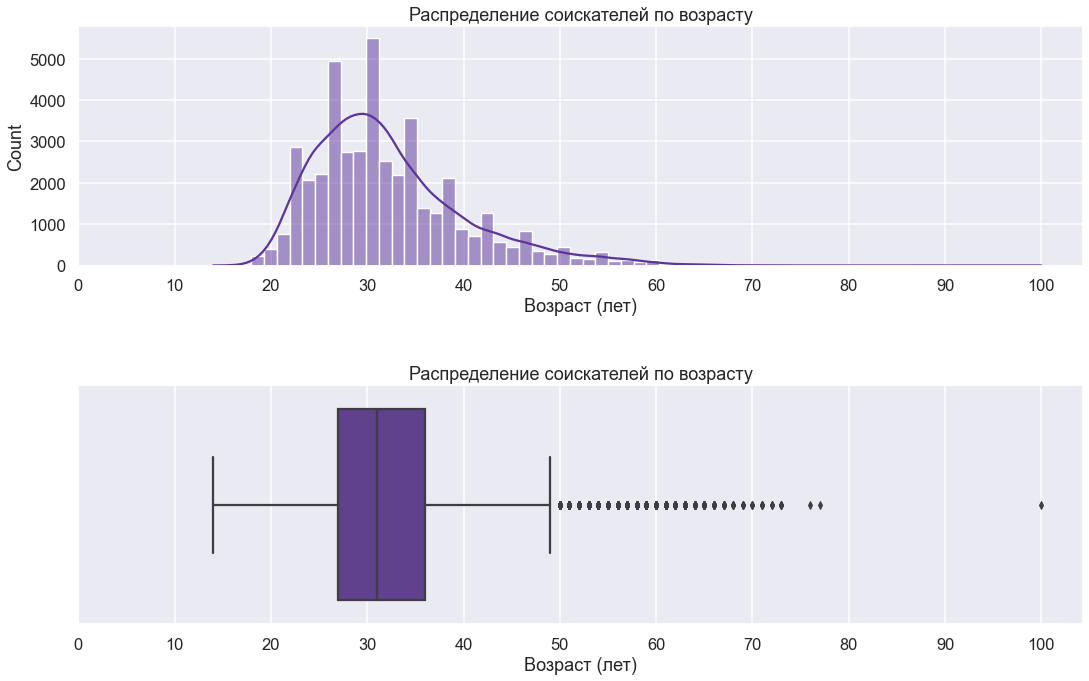

In [345]:
# настраиваем стиль отображения графиков 
sns.set(context = 'talk', style = 'darkgrid', palette = 'twilight_shifted', font = 'sans-serif', font_scale = 1)

# задаем размеры фигуры и координатной плоскости
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 11))

# строим гистограмму распределения
plt.subplots_adjust(hspace=.5)
sns.histplot(data = merged_sample,
             x = "Возраст", 
             bins = 65, 
             kde = True, 
             ax = axes[0]);
axes[0].set_title("Распределение соискателей по возрасту", fontsize = 18)
axes[0].set(xticks = np.arange(0, 110, 10)); 
axes[0].set_xlabel('Возраст (лет)');
#axes[0].set_xticklabels([0, '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']);
#sns.set_style("ticks")


# строим коробчатую диаграмму
sns.boxplot(data=merged_sample, 
            x = "Возраст", 
            ax = axes[1])
axes[1].set_title("Распределение соискателей по возрасту", fontsize=18);
axes[1].set(xticks = np.arange(0, 110, 10)); 
#axes[1].set_xticklabels([0, '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']);
axes[1].set_xlabel('Возраст (лет)');

Чему равна мода распределения?
Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?
Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?

#### **Вывод**  
Гистограмма распределения возраста соискателей дает нам визуальное отображение количества резюме по возрастному признаку. 
В графике отчетливо выделяются «пеньки», которые соответствуют наиболее часто встречающемуся значению возраста соискателей, к ним относятся по восходящей - соискатели с возрастом 23 года, 27 лет, 30 лет. После 35 лет количество резюме уменьшается. 
Можно предположить, что соискатели 23-х лет ищут свою первую работу или подработку, если они продолжают обучение.
Соискатели  27 и 30 лет, возможно, ищут новое место работы, с повышением ЗП, либо вторую работу с удобным графиком
Соискатели 35 лет, вероятно, имея опыт работы и обладая компетенциями, могут искать работу с более лучшими  условиями труда.
Мода распределения равна 30 годам, что может объяснить большим количеством людей данной возрастной группы на рынке труда.
Коробчатая диаграмма показывает, что 50 % всех резюме находится в диапазоне от 27 до 37 лет, минимальная граница распределения составляет 14 лет, максимальная 49 лет. Резюме соискателей 50 лет и старше согласно графику являются выбросами, сомнения вызывают отдельно стоящие наблюдения 77, 78 лет,  при этом максимальное значение равно 100 лет, что конечно, является аномалией, поскольку данные  не очищены.

### [Задание 4.1]
### Чему равно модальное значение возраста соискателей?

In [283]:
merged_sample['Возраст'].mode()

0    30
Name: Возраст, dtype: int64

[2.] Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

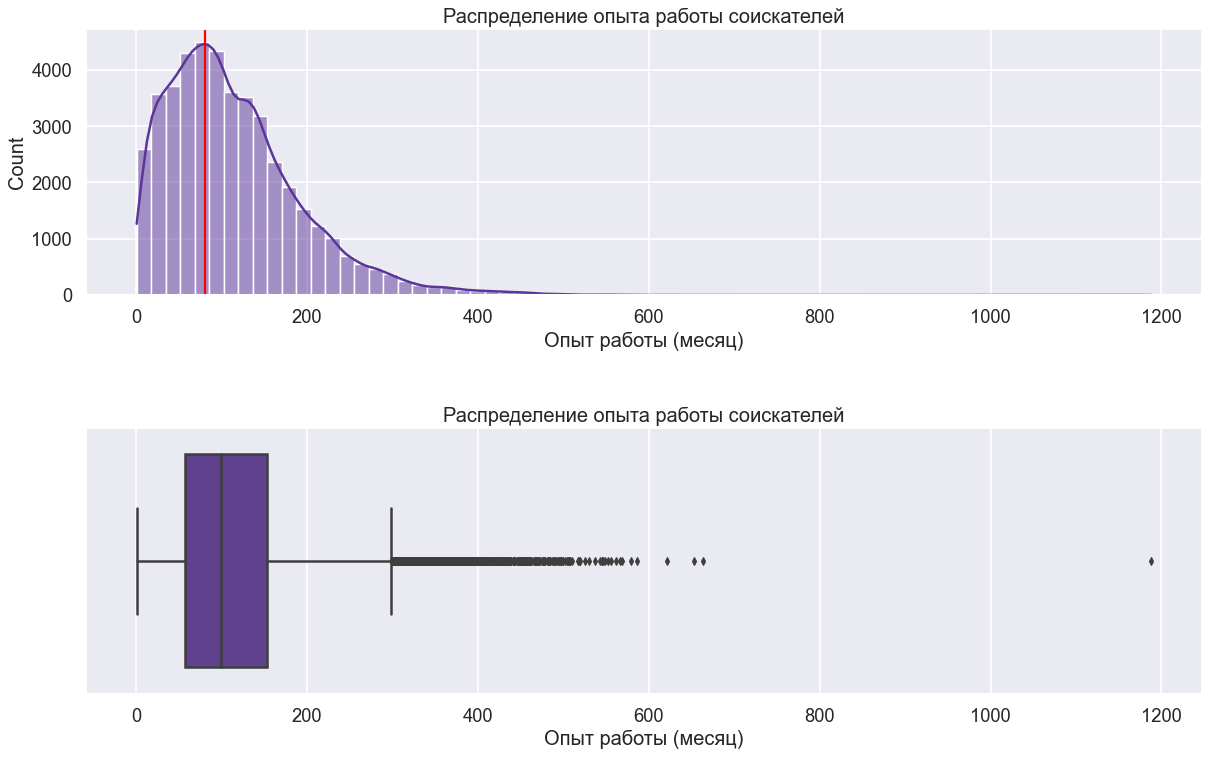

In [352]:
# настраиваем стиль отображения графиков 
sns.set(context = 'talk', style = 'darkgrid', palette = 'twilight_shifted', font = 'sans-serif', font_scale = 1)

# задаем размеры фигуры и координатной плоскости 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (18,11), dpi = 80);
plt.subplots_adjust(hspace=.5)

# строим гистограмму распределения
sns.histplot(data = merged_sample,
             x = "Опыт работы(месяц)", 
             bins = 70,
             kde = True, 
             ax = axes[0]);
axes[0].set_xlabel('Опыт работы (месяц)');
axes[0].set(xticks = np.arange(0, 1400, 200)); 
axes[0].set_xticklabels([0, '200', '400', '600', '800', '1000', '1200']);
axes[0].set_title("Распределение опыта работы соискателей", fontsize = 18)
axes[0].axvline(x = 81.0, color='r', lw=2);
# строим коробчатую диаграмму
sns.boxplot(data = merged_sample, 
            x = "Опыт работы(месяц)", 
            ax=axes[1]);
axes[1].set_xlabel('Опыт работы (месяц)');
axes[1].set_title("Распределение опыта работы соискателей", fontsize = 18);
axes[1].set(xticks = np.arange(0, 1400, 200));  
axes[1].set_xticklabels([0, '200', '400', '600', '800', '1000', '1200']);

Чему равна мода распределения?
Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?
Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?

#### **Вывод**
Мода распределения опыта работы равна 81 месяцу.
Согласно коробчатой диаграмме опыт работы 50 % соискателей находится в интервале от 50 до 150 месяцев, медиана находится на отметке 100 месяцев. 
Выбросы за границами максимальной границы распределения начинаются после отметки 300 месяцев (25 лет), явными аномалиями выглядят записи в интервале от 600 до 700 месяцев, (опыт 50 лет), запись приблизительно 1990 месяцев (165 лет) выглядит абсурдом.

In [362]:
merged_sample["Опыт работы(месяц)"].mode()

0    81.0
Name: Опыт работы(месяц), dtype: float64

### [Задание 4.2]
### Чему равен максимальный опыт работы (в месяцах)?

In [285]:
merged_sample["Опыт работы(месяц)"].max()

1188.0

In [347]:
merged_sample["Опыт работы(месяц)"].mode()

0    81.0
Name: Опыт работы(месяц), dtype: float64

[3.] Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


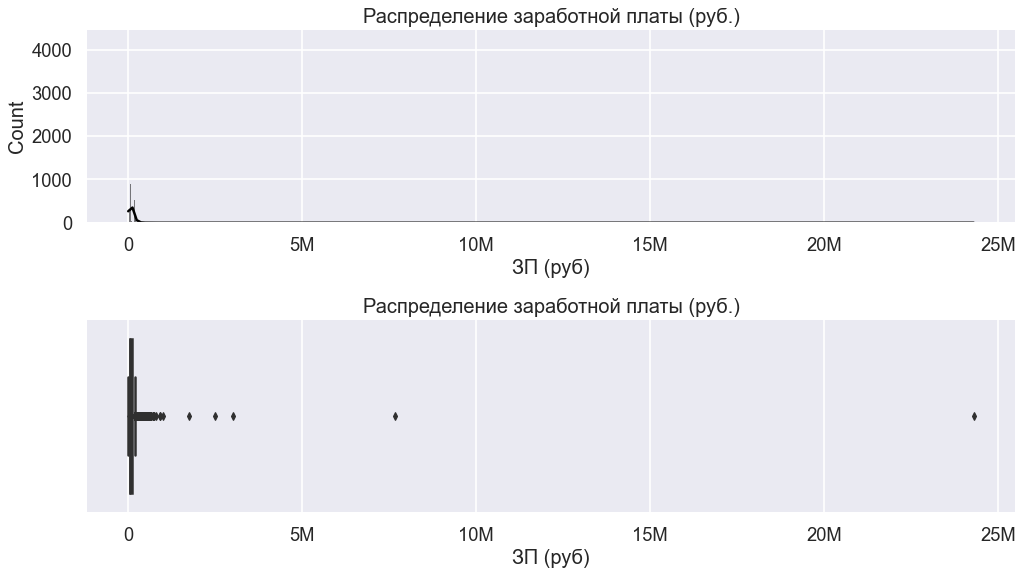

In [286]:
# настраиваем стиль отображения графиков 
sns.set(context = 'talk', style = 'darkgrid', palette = 'twilight_shifted_r', font = 'sans-serif', font_scale = 1)

# задаем размеры фигуры и координатной плоскости 
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8), dpi = 80);
plt.subplots_adjust(hspace=.5)

# строим гистограмму распределения
sns.histplot(data = merged_sample,
             x = "ЗП (руб)", 
             kde = True, 
             ax = axes[0],
             color = 'k');
axes[0].set(xticks = np.arange(0, 3e7, 5e6));
axes[0].set_xticklabels([0, '5M', '10M', '15M', '20M', '25M']);
axes[0].set_title("Распределение заработной платы (руб.)");

# строим коробчатую диаграмму
sns.boxplot(data = merged_sample, 
            x = "ЗП (руб)", 
            ax = axes[1]);
axes[1].set_title("Распределение заработной платы (руб.)");
axes[1].set(xticks = np.arange(0, 30000000, 5000000));
axes[1].set_xticklabels([0, '5M', '10M', '15M', '20M', '25M']);

Чему равна мода распределения?
Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?

#### **Вывод**
Графики, построенные на преобразованных данных признака ЗП сильно деформированы под влиянием выбросов и визуально определить значения невозможно. Мода распределения ЗП равна 50 тыс. руб . 50% наблюдений находятся в диапазоне от 37 тыс. руб. до 95 тыс. руб. Аномальными значениями являются записи с ЗП выше 1 млн - это  приблизительно  2,4 млн, 2,5 млн, 2,6 млн, 8млн и 24 млн.

In [361]:
merged_sample["ЗП (руб)"].mode()

0    50000.0
Name: ЗП (руб), dtype: float64

In [365]:
q1 = merged_sample["ЗП (руб)"].quantile(0.25)

In [364]:
q3 = merged_sample["ЗП (руб)"].quantile(0.75)

In [366]:
iqr = q3 - q1

In [367]:
lower_bound = q1 - (iqr * 1.5)
print(lower_bound)
upper_bound = q3 + (iqr * 1.5)
print(upper_bound)

-49794.500000000015
181876.7


### [Задание 4.3]
### Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.

In [287]:
merged_sample[merged_sample["ЗП (руб)"] > 1000000].shape[0]

5

[4.] Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [288]:
salary_df = merged_sample.groupby("Образование", as_index = False)["ЗП (руб)"].median()
salary_df

,Образование,ЗП (руб)
0,Высшее,60000.0
1,Неоконченное высшее,50000.0
2,Среднее,40000.0
3,Среднее специальное,40000.0


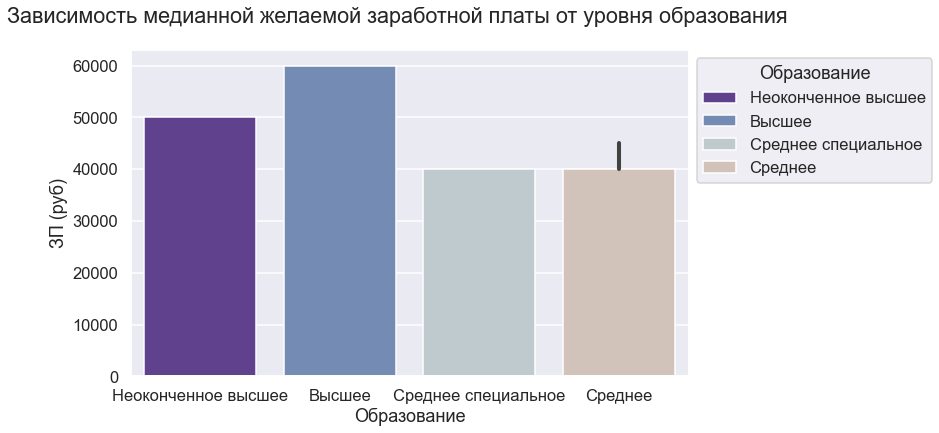

In [302]:
# настраиваем стиль отображения графиков 
sns.set(context = 'talk', style = 'darkgrid', palette = 'twilight_shifted', font = 'sans-serif', font_scale = 1)

# задаем размеры фигуры и координатной плоскости
fig, ax = plt.subplots(figsize=(10,6))
plt.suptitle("Зависимость медианной желаемой заработной платы от уровня образования ");

# строим столбчатую диаграмму распределения
salary_barplot = sns.barplot(data = merged_sample, x = 'Образование', y = "ЗП (руб)", estimator = np.median, hue = 'Образование', dodge = False );
salary_barplot.tick_params(axis='x', rotation=0)
salary_barplot.set_xlabel('Образование', fontsize = 18);
sns.move_legend(salary_barplot, "upper left", bbox_to_anchor=(1,1))

Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

#### **Вывод**
Наибольший уровень ожидаемой ЗП наблюдается у соискателей с высшим образованием, в то время как наименьший уровень зарплатных ожиданий у соискателей со средним и средним специальном образовании
Я думаю однозначного ответа на вопрос стоит ли учитывать уровень образования при прогнозировании заработной платы нет. Все зависит от ситуации и требований конкретного работодателя.
Аспект образования, несомненно, важен в сферах, которые требуют профессиональной теоретической подготовки, которую невозможно перекрыть только наличием опыта или самообразованием

### [Задание 4.4]
### Какая категория образования оплачивается выше всех по медианному показателю?

Высшее

[5.] Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [297]:
salary_city = merged_sample.groupby("Город", as_index = False)["ЗП (руб)"].median()
salary_city

,Город,ЗП (руб)
0,Волгоград,35000.0
1,Воронеж,40000.0
2,Екатеринбург,50000.0
3,Казань,40000.0
4,Красноярск,40000.0
5,Москва,85000.0
6,Новосибирск,45000.0
7,Омск,40000.0
8,Пермь,40000.0
9,Ростов-на-Дону,40000.0


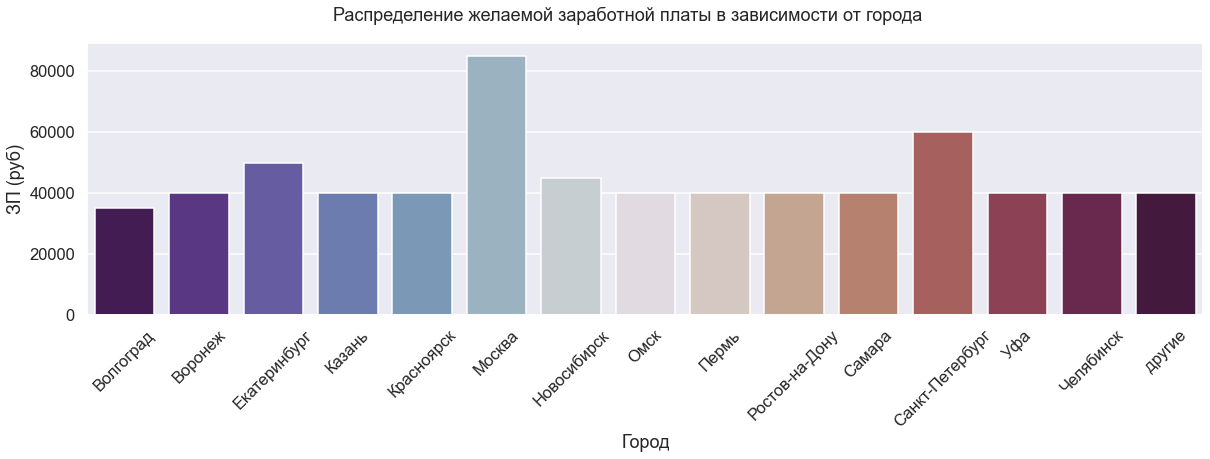

In [301]:
# настраиваем стиль отображения графиков 
sns.set(context = 'talk', style = 'darkgrid', palette = 'twilight_shifted', font = 'sans-serif', font_scale = 1)

# задаем размеры фигуры и координатной плоскости
fig, ax = plt.subplots(figsize=(20,5))
plt.suptitle("Распределение желаемой заработной платы в зависимости от города", fontsize = 18);

# строим столбчатую диаграмму распределения
salary_barplot = sns.barplot(data = salary_city, 
                             x = 'Город', 
                             y = "ЗП (руб)", 
                             palette = 'twilight_shifted');

#salary_barplot.set_title('Распределение желаемой заработной платы ("ЗП (руб)") в зависимости от города', fontsize=18)
salary_barplot.tick_params(axis='x', rotation=45)
salary_barplot.set_xlabel('Город', fontsize = 18);

Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?
Как вы считаете, важен ли признак города при прогнозировании заработной платы?

#### **Вывод**
Города, представленные на диаграмме, были разделены на 3 группы:
2 города федерального значения, города-миллионники и категория другие, куда вошли самые разнообразные города с численностью до 1 млн. человек, то есть это может быть и столица региона, и город - районный центр и т.д.
По данным диаграммы ЗП в Москве почти в 2 раза выше, чем в городах - миллионниках и составляет в среднем 80 тыс. руб., немного ниже ЗП в Санкт-Петербурге – 60 тыс. руб. В городах-миллионниках, за исключением Екатеринбурга с показателем в 50 тыс. руб. и Новосибирска с 45 тыс. руб. 
заработная плата находится на одном уровне в 40 тыс. руб.
При прогнозировании заработной платы признак города, на мой взгляд, следует учитывать, поскольку уровень жизни различается от города к городу, зарплата в некоторых малых городах может быть выше средней заработной платы в столице, что может объясняться определенной экономической специализацией региона (например, добывающая, обрабатывающая промышленность), а может быть даже ниже МРОТ. Чем выше уровень заработной платы, тем выше уровень жизни, и наоборот.

### Задание 4.5
### В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?

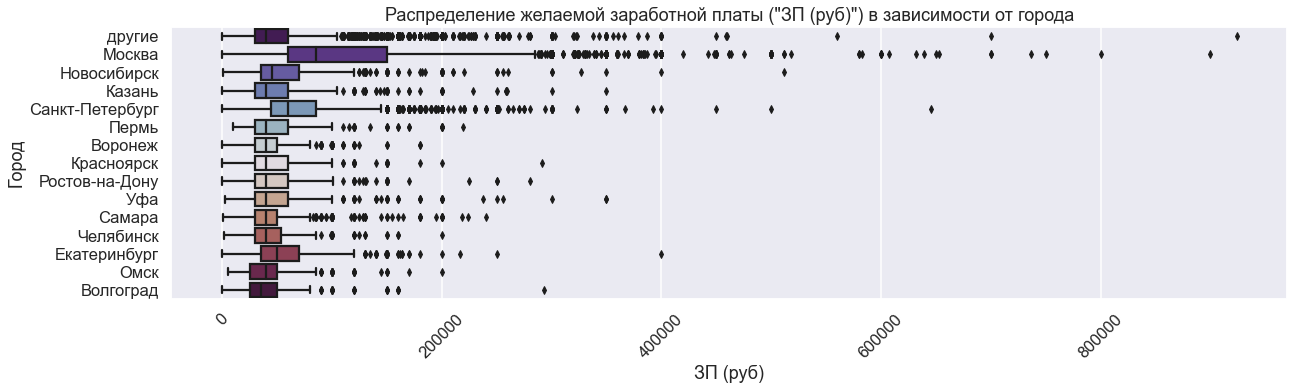

In [303]:
# построим коробчатую диаграмму распределения ЗП по городам при условии ЗП меньше 100000 
salary_box = merged_sample[merged_sample["ЗП (руб)"] < 1000000]
# задаем размеры фигуры и координатной плоскости
fig = plt.figure(figsize=(20,5), )

salary_boxplot = sns.boxplot(data=salary_box, x = "ЗП (руб)", y = 'Город', palette = 'twilight_shifted');
salary_boxplot.set_title('Распределение желаемой заработной платы ("ЗП (руб)") в зависимости от города', fontsize=18)
salary_boxplot.tick_params(axis='x', rotation=45)

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

### Сгруппируем признаки "Готовность к переезду", "Готовность к командировкам" по медианной ЗП

In [308]:
salary_add = merged_sample.groupby(["Готовность к переезду", "Готовность к командировкам"], as_index = False)["ЗП (руб)"].median()
salary_add                     

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,False,False,40000.000
1,False,True,60000.000
2,True,False,50000.000
3,True,True,65849.455


In [309]:
salary_add ["Готовность к переезду"] = salary_add ["Готовность к переезду"].apply(lambda x: "Нет" if (x==False) else "Да")

In [310]:
salary_add["Готовность к командировкам"] = salary_add["Готовность к командировкам"].apply(lambda x: "Да" if (x==True) else "Нет")

In [311]:
salary_add

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,Нет,Нет,40000.000
1,Нет,Да,60000.000
2,Да,Нет,50000.000
3,Да,Да,65849.455


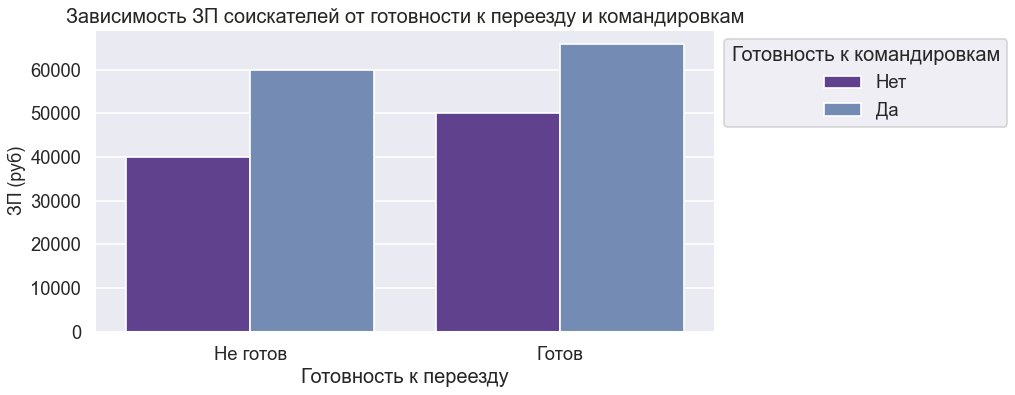

In [313]:
# настраиваем стиль отображения графиков 
sns.set(context = 'talk', style = 'darkgrid', palette = 'twilight_shifted', font = 'sans-serif', font_scale = 1)

# задаем размеры фигуры и координатной плоскости
fig, ax = plt.subplots(figsize=(10,5), dpi = 80)

# строим многоуровневую столбчатую диаграмму 
move_barplot = sns.barplot(data = salary_add, 
                             y = 'ЗП (руб)', 
                             x = "Готовность к переезду",
                             hue = "Готовность к командировкам",  
                             orient = 'v',
                             ci = 0);
move_barplot.set_title('Зависимость ЗП соискателей от готовности к переезду и командировкам', fontsize=18);
move_barplot.set_xlabel('Готовность к переезду', fontsize=18);
move_barplot.set_ylabel('ЗП (руб)', fontsize=16);
move_barplot.set_xticklabels(['Не готов', 'Готов'])
sns.move_legend(move_barplot, "upper left", bbox_to_anchor=(1,1))

Проанализируйте график, сравнив уровень заработной платы по категориям.

#### **Вывод**
Основываясь на графике, можно заключить, что заработная плата больше зависит от готовности соискателей к командировкам, чем от готовности к переезду. Так, если соискатель готов и к переезду, и к командировкам, то он может рассчитывать на зарплату чуть более 60 тыс., в случае, если соискатель не готов к переезду, но готов к командировкам зарплата составляет в среднем 60 тыс. руб. Самый низкий уровень заработной платы в случае, если кандидат не готов ни к переездам, ни к командировкам. В этом случае заработная составляет в среднем 40 тыс. руб.

### Задание 4.6
### Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).

In [314]:
merged_sample[(merged_sample["Готовность к переезду"]) & (merged_sample["Готовность к командировкам"])]['ЗП (руб)'].median()

65849.455

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [315]:
pivot_df = merged_sample.pivot_table(values = "ЗП (руб)", index = "Образование", columns = "Возраст", aggfunc = "median", )
display(pivot_df)

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
Высшее,60000.0,NaN,122582.49,90075.5,30000.0,30000.0,30000.0,35000.0,40000.0,45000.0,...,70000.0,79000.0,112500.0,80000.0,75000.0,75000.0,62500.0,45000.0,90000.0,NaN
Неоконченное высшее,NaN,NaN,NaN,80000.0,25000.0,30000.0,31000.0,35000.0,40000.0,40000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Среднее,NaN,10000.0,NaN,44000.0,35000.0,45000.0,29000.0,40000.0,40000.0,35000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Среднее специальное,NaN,2000.0,30000.00,25000.0,25151.0,30000.0,30000.0,30000.0,30000.0,35000.0,...,120000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0


### Теперь построим тепловую карту на основе полученной свобдной таблицы

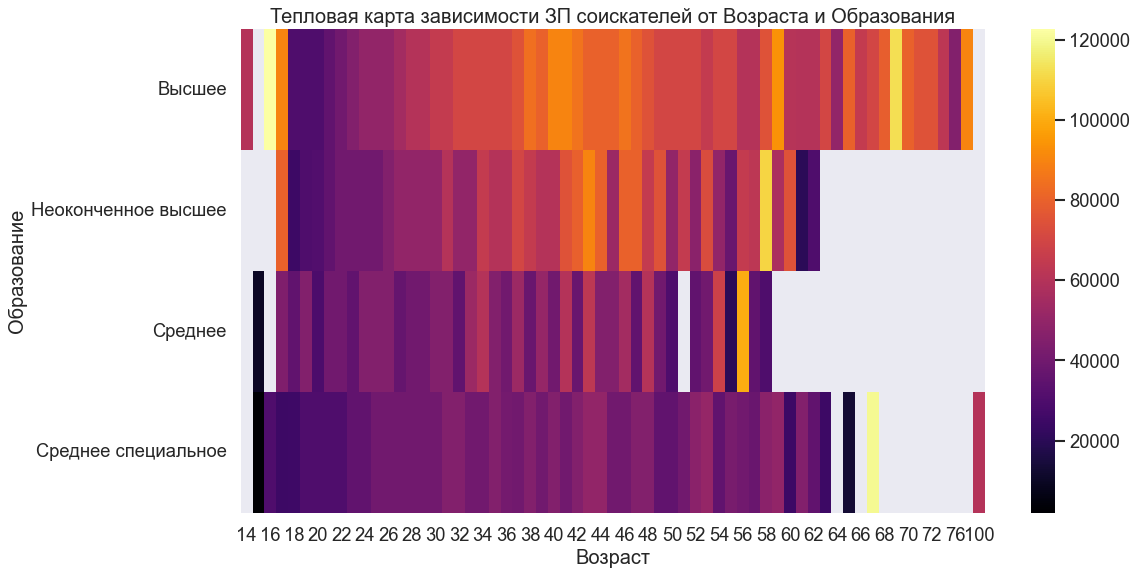

In [316]:
# задаем размеры фигуры и координатной плоскости
fig, ax = plt.subplots(figsize=(15,8), dpi = 80)

# строим тепловую карту 
heatmap_df = sns.heatmap(data = pivot_df,
                         cmap = 'inferno');
heatmap_df.set_title('Тепловая карта зависимости ЗП соискателей от Возраста и Образования', fontsize=18);
heatmap_df.tick_params(axis='y', rotation= 0);
heatmap_df.tick_params(axis='x', rotation = 0);
heatmap_df.set_xlabel("Возраст");
heatmap_df.set_ylabel("Образование");

Проанализируйте тепловую карту, сравнив показатели внутри групп.

#### **Вывод**
Получившуюся тепловую карту можно разделить на две сектора: нижний блок, который представлен средним и средним специальным образованием, на котором преобладает диапазон зарплат от от 20 тыс. до 50 тыс., выше этой границы представлены отдельные случаи, в целом наблюдается тенденция незначительного роста зарплаты в зависимости от возраста и образования.
Иначе дела обстоят с верхним сектором, в котором представлены неоконченное высшее и высшее образование. Здесь минимальный уровень зарплаты от 20 тыс. до 30 тыс. руб. является стартовым уровнем зарплаты. С увеличением возраста растет и зарплата в среднем до значения в 90 тыс. у кандидатов с неоконченным высшим образованием. Наиболее отчетливым представляется увеличение заработной платы у соискателей с высшим образованием, от минимальной границы в 30 тыс. до 100 тыс руб.

### Задание 4.7
### Для какой категории образования наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая)?

'Высшее'

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [317]:
scatter_sample = merged_sample.copy()
scatter_sample['Опыт работы (год)'] = scatter_sample['Опыт работы(месяц)'].apply(lambda x: x / 12)

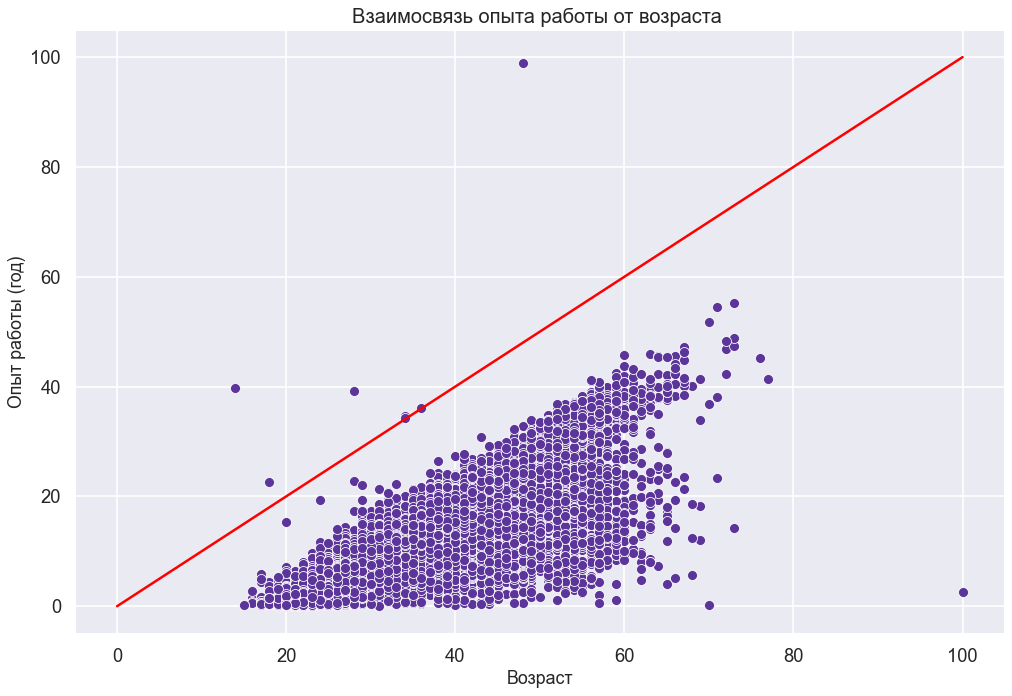

In [192]:
# настраиваем стиль отображения графиков 
fig, ax = plt.subplots(figsize=(15, 10), dpi = 80)

# строим диаграмму расссеяния
scatplot = sns.scatterplot(x = 'Возраст',
                           y = 'Опыт работы (год)',
                           data = scatter_sample);
sns.lineplot(x = [0, 100], y = [0, 100], color = 'Red');
scatplot.set_title('Взаимосвязь опыта работы от возраста ', fontsize=18);
scatplot.set_xlabel('Возраст', fontsize = 16);
scatplot.set_ylabel('Опыт работы (год)', fontsize = 16);

#### **Вывод**
Подавляющее количество наблюдений находится под прямой, проходящей через координаты (0,0) и (100,100), что означает, что с увеличением возраста следует увеличение опыта работы. 
Также, мы наблюдаем аномалии, резюме 7 кандидатов, точки выше прямой, которые содержат данные об опыте работы, превышающем возраст, а также записи в которых указано абсурдное значение возраста и при этом отсутствие опыта работы.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


### Построим круговую диаграмму для визуализации количества резюме соискателей по признаку пола

In [376]:
small_df = merged_sample['Пол'].value_counts()
display(small_df)

М    36211
Ж     8533
Name: Пол, dtype: int64

In [377]:
dis_count =  pd.DataFrame({'Пол' : small_df.index, 'Количество' : small_df.values})
display(dis_count)

,Пол,Количество
0,М,36211
1,Ж,8533


In [378]:
dis_count['Пол'] = dis_count['Пол'].apply(lambda x: 'Мужчины' if (x == 'М') else 'Женщины')
dis_count['Количество'] = dis_count['Количество'].apply(lambda x: round(x * 100 / 44744, 1))

In [379]:
display(dis_count)

,Пол,Количество
0,Мужчины,80.9
1,Женщины,19.1


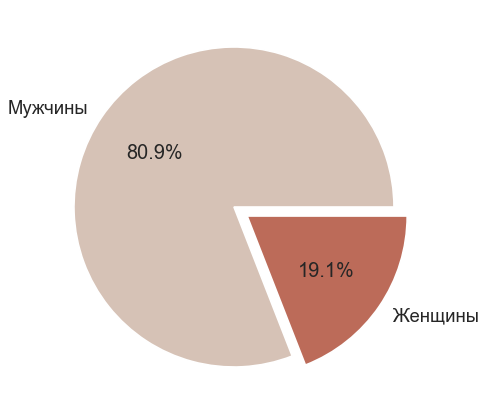

In [380]:
# настраиваем стиль отображения графиков 
colors = sns.color_palette('twilight_shifted')[3:5]
# задаем названия секторов
labels = ['Мужчины', 'Женщины']

# строим круговую диаграмму
fig = plt.figure(figsize=(10, 5), dpi = 80)
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(small_df, labels = labels, autopct='%.1f%%', explode = [0, 0.1], colors = colors);

#### **Вывод**
Подавляющая доля резюме в датасете принадлежит соискателям мужчинам приблизительно 81%, в то время как резюме соискателей женщин в датасете составляет только 19 %, таким образом, можно сказать, что ресурс hh более востребован среди мужчин, которые ищут работу и менее у женщин.

### Построим столбчатую диаграмму зависимости ЗП от уровня образования и пола соискателей

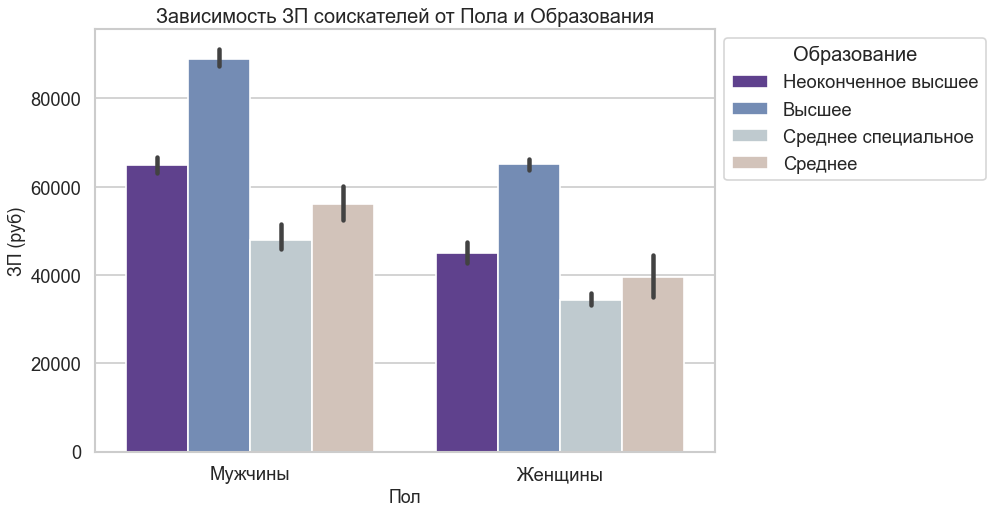

In [381]:
# настраиваем стиль отображения графиков
sns.set(context = 'talk', style = 'whitegrid', palette = 'twilight_shifted', font = 'sans-serif', font_scale = 1)

# задаем размеры фигуры и координатной плоскости
fig, ax = plt.subplots(figsize=(10, 7), dpi = 80)

# строим столбчатую диаграмму
barplot = sns.barplot(data = merged_sample, 
                             y = 'ЗП (руб)', 
                             x = 'Пол',
                             hue = 'Образование');
                            
barplot.set_xticklabels(['Мужчины', 'Женщины'])
barplot.set_title('Зависимость ЗП соискателей от Пола и Образования', fontsize=18);

barplot.set_xlabel('Пол', fontsize=16);
barplot.set_ylabel('ЗП (руб)', fontsize=16);
sns.move_legend(barplot, "upper left", bbox_to_anchor=(1,1))

#### **Вывод**
Взглянем на зависимость зарплаты от образования и пола соискателя. Итак, самая высокая зарплата у мужчин с высшим образованием около 90 тыс. руб. у женщин с высшим образованием уровень зарплаты составляет, примерно 65 тыс. руб. 
Мужчина с неоконченным высшим образованием может рассчитывать в среднем на зарплату в 65 тыс. руб., а женщина с эквивалентным уровнем образования в 45 тыс. руб. 
Самый низкий уровень зарплаты чуть меньше 40 тыс. руб. у женщин со средним специальным образованием. Таким образом, при эквивалентности уровня образования соискателей, заработная плата мужчины выше на 20%
#### *Примечание*  Разница в уровне заработной платы мужчин и женщин ~ 20%  может быть вызвана незначительной долей резюме соискателей женщин в датасете

### Построим столбчатую диаграмму распределения количества резюме соискателей по городам

In [382]:
cities = merged_sample['Город'].value_counts()
display(cities)

Москва             16621
другие             16452
Санкт-Петербург     4937
Новосибирск          958
Казань               872
Екатеринбург         734
Самара               703
Ростов-на-Дону       607
Уфа                  565
Воронеж              538
Пермь                445
Красноярск           407
Челябинск            330
Омск                 303
Волгоград            272
Name: Город, dtype: int64

In [383]:
cities_list = pd.DataFrame({'city' : cities.index, 'count' : cities.values})
cities_list[:16]

,city,count
0,Москва,16621
1,другие,16452
2,Санкт-Петербург,4937
3,Новосибирск,958
4,Казань,872
5,Екатеринбург,734
6,Самара,703
7,Ростов-на-Дону,607
8,Уфа,565
9,Воронеж,538


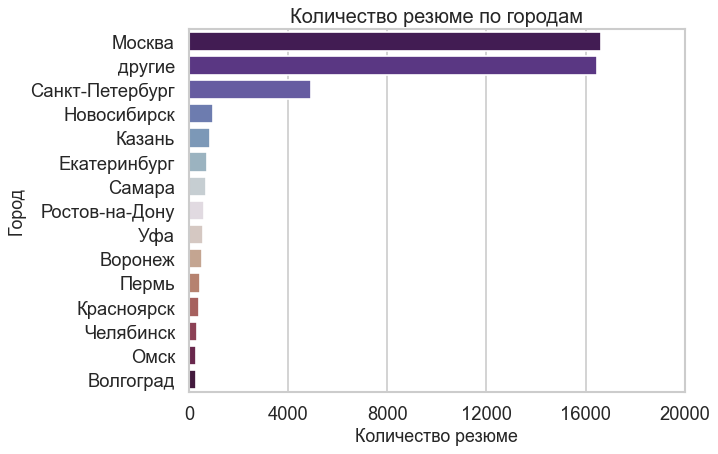

In [384]:
sns.set(context = 'talk', style = 'whitegrid', palette = 'twilight_shifted', font = 'sans-serif', font_scale = 1)

fig, axes = plt.subplots(figsize=(8,6), dpi = 80)
barplot = sns.barplot(data = cities_list, 
                             y = 'city', 
                             x = 'count',
                             orient = 'h',
                             palette = 'twilight_shifted');
barplot.set_title('Количество резюме по городам', fontsize=18);
barplot.set_xlabel('Количество резюме', fontsize=16);
barplot.set_ylabel('Город', fontsize=16);
barplot.set(xticks = np.arange(0, 24000, 4000));
barplot.set_xticklabels([0, '4000', '8000', '12000', '16000', '20000']);

#### **Вывод**
Распределение количества резюме по городам может свидетельствовать о том, что Москва (17 тыс. руб.) и Санкт-Петербург  (5 тыс. руб.)  — это основные рынки труда, и точки притяжения. Вторая по количеству категория «другие» (17 тыс. руб.) включает большое количество больших и малых городов, но они обезличены и мы не можем  сказать что-то более определенное. Количество резюме в городах-миллионниках уменьшается в географическом плане  с  востока на запад.

# Очистка данных

[1.] Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

### Создаем рабочую копию 

In [385]:
clean_new = merged_sample.copy() 

### Удаляем все неинформативные признаки для дальнейшего процесса очистки

In [386]:
clean_new = clean_new.drop(['Валюта', 'currency', 'date', 'close', 'proportion'], axis = 1)

In [387]:
duplicate_col = clean_new.columns.to_list()
mask = clean_new.duplicated(subset = duplicate_col)
duplicate_rec = clean_new[mask]
print(f"Число найденных дубликатов: {duplicate_rec.shape[0]}")

Число найденных дубликатов: 161


### Теперь нам необходимо от них избавиться. Для этого легче всего воспользоваться методом drop_duplicates(), который удаляет повторяющиеся записи из таблицы.
### Создадим новую таблицу hh_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.

In [388]:
hh_dedupped = clean_new.drop_duplicates(subset = duplicate_col)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Результирующее число записей: 44583


[2.] Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

### Задание 5.2
### Займёмся пропусками. Выведите информацию о числе пропусков в столбцах.
### Сколько пропусков в столбце «Опыт работы (месяц)»?

In [405]:
null_data = hh_dedupped.isnull().sum()
display(null_data)

Ищет работу на должность:            0
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Обновление резюме                    0
Авто                                 0
Образование                          0
Возраст                              0
Пол                                  0
Опыт работы(месяц)                 166
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтерство                         0
Полный день                          0
Гибкий график                        0
Сменный график                       0
Вахтовый метод                       0
Удаленная работа                     0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [390]:
hh_dedupped = hh_dedupped.dropna(subset = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
display(hh_dedupped.isnull().sum())

Ищет работу на должность:            0
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Обновление резюме                    0
Авто                                 0
Образование                          0
Возраст                              0
Пол                                  0
Опыт работы(месяц)                 168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтерство                         0
Полный день                          0
Гибкий график                        0
Сменный график                       0
Вахтовый метод                       0
Удаленная работа                     0
ЗП (руб)                             0
dtype: int64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [391]:
outliers = hh_dedupped[(hh_dedupped['ЗП (руб)'] < 1e3) | (hh_dedupped['ЗП (руб)'] > 1e6)]
hh_dedupped = hh_dedupped.drop(outliers.index)
print(outliers.shape[0])

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [392]:
outliers = hh_dedupped[(hh_dedupped['Опыт работы(месяц)'] / 12) > hh_dedupped['Возраст']]

In [393]:
hh_dedupped = hh_dedupped.drop(outliers.index)
print(outliers.shape[0])

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

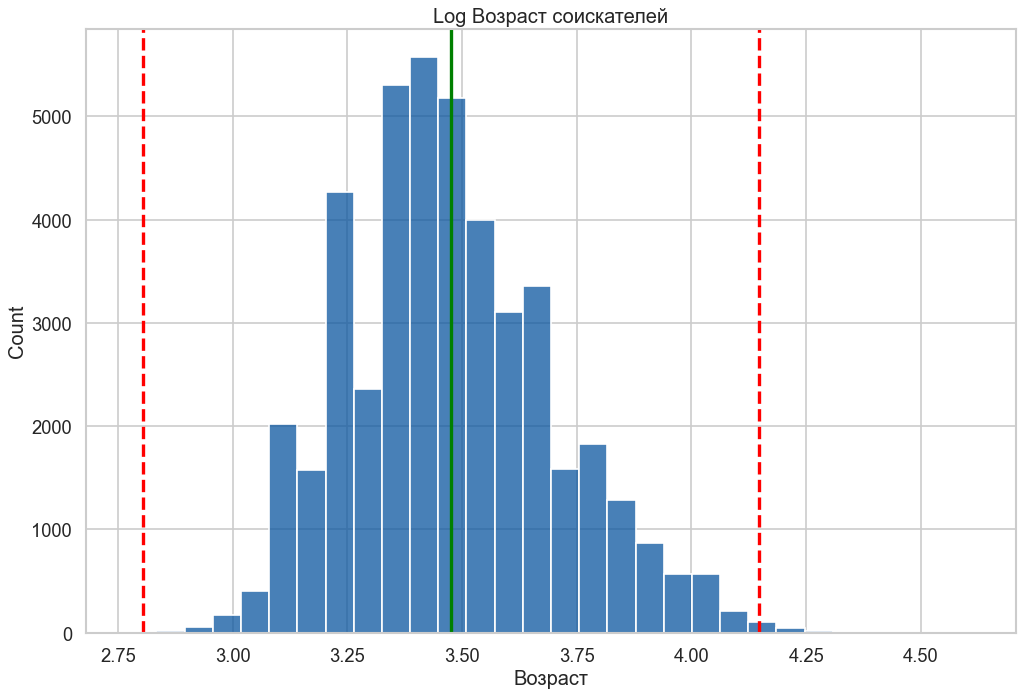

In [398]:
sns.set(context = 'talk', style = 'whitegrid', palette = 'Blues_r', font = 'sans-serif', font_scale = 1)
fig, axes = plt.subplots(figsize=(15, 10), dpi = 80)

#гистограмма в логарифмическом масштабе
candidate_age= np.log(hh_dedupped['Возраст'] + 1)
histplot = sns.histplot(candidate_age, bins=30);
histplot.set_title('Log Возраст соискателей');
histplot.axvline(candidate_age.mean(), color='g', lw=3);
histplot.axvline(candidate_age.mean()+ 3 * candidate_age.std(), color='r', ls='--', lw=3);
histplot.axvline(candidate_age.mean()- 3 * candidate_age.std(), color='r', ls='--', lw=3);

#### **Коммментарий**

In [396]:
print(f"Вычисляем тип ассиметрии: {hh_dedupped['Возраст'].skew()}")

Вычисляем тип ассиметрии: 1.1251795112008725


#### **Вывод**
Распределение имеет правостороннюю ассиметрию, так как Аs > 0. 
Также на графике видно, что справа от моды - самого высокого столбика, мы видим больше наблюдений, чем слева от моды. 

### Добавим в алгоритм метода z-отклонения параметры left и right, которые будут задавать число сигм (стандартного отклонения), чтобы иметь возможность контролировать усиление или ослабление границ z-отклонения

In [403]:
def outliers_z_score_mod(data, feature, log_scale= False, left=3, right=4):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [404]:
outliers,  hh_dedupped = outliers_z_score_mod(hh_dedupped, 'Возраст', left=3, right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
#print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0


### Выведем переменную outliers и посмотрим как записи попали в выбросы

In [258]:
outliers

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы(месяц),Город,...,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Гибкий график,Сменный график,Вахтовый метод,Удаленная работа,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее,15,М,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,False,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное,15,М,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,100,М,30.0,Санкт-Петербург,...,True,True,True,False,True,True,False,False,True,60000.0


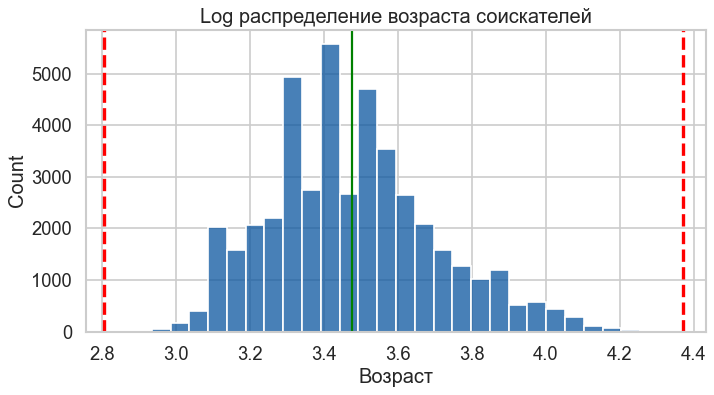

In [256]:
sns.set(context = 'talk', style = 'whitegrid', palette = 'Blues_r', font = 'sans-serif', font_scale = 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi = 80)
candidate_age = np.log(hh_dedupped['Возраст'] + 1)
histplot = sns.histplot(candidate_age, bins=30, ax=ax)
histplot.axvline(candidate_age.mean(), color='g', lw=2)
histplot.axvline(candidate_age.mean() + 4 * candidate_age.std(), color='r', ls='--', lw=3)
histplot.axvline(candidate_age.mean() - 3 * candidate_age.std(), color='r', ls='--', lw=3)
histplot.set_title('Log распределение возраста соискателей', fontsize=18);